- Load Geospatial Data: Reads a shapefile containing world map data, keeping only country names and geometries.
- Preprocessing: Removes Antarctica from the dataset for better visual clarity.
- Projection Transformation: Changes the map's coordinate reference system (CRS) to Web Mercator (EPSG:3857).
- Area Calculation: Computes the area of each country in square kilometers.
- Basic Map Visualization: Plots a simple map to ensure the data is rendered correctly.
- Color Mapping: Creates maps colored by country names (categorical) and areas (quantitative), adding legends for interpretation.
- Legend Resizing: Adjusts the legend size and positions it next to the map for better readability.
- Purpose: The code creates a series of maps for exploring, analyzing, and presenting geographical data, emphasizing countries' areas.

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

<Axes: >

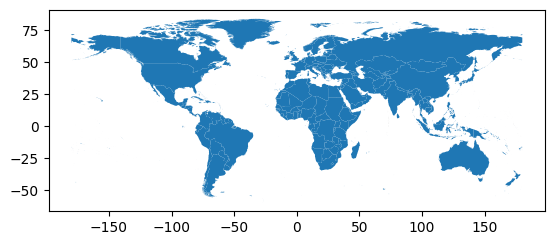

In [49]:
# Reading the world shapefile 
world_data=gpd.read_file(r'Visualizing Geographical Data\world.shp')
world_data=world_data[['NAME','geometry']]

# Calculating the area of each country 
world_data['area']=world_data.area

# Removing Antarctica from GeoPandas GeoDataframe
world_data= world_data[world_data['NAME']!='Antarctica']
world_data.plot()

<Axes: >

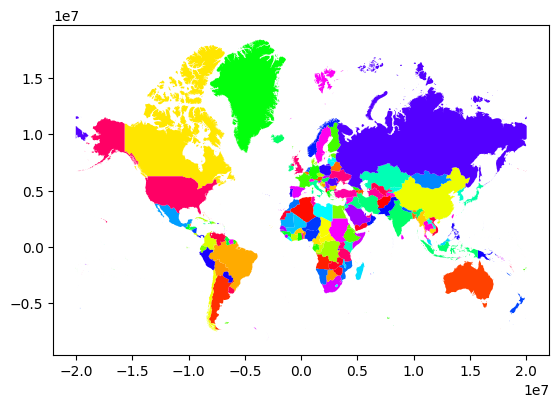

In [50]:
# Changing the projection
current_crs=world_data.crs   
world_data.to_crs(epsg=3857,inplace=True)
world_data.plot(column='NAME',cmap='hsv')

<Axes: >

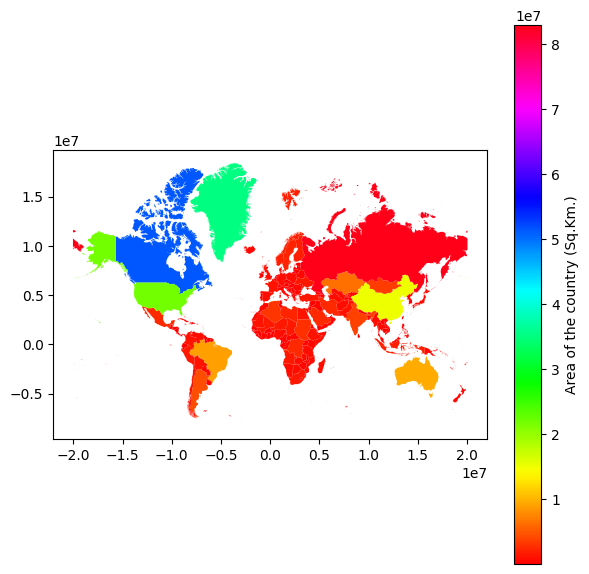

In [51]:
# Re-calculating the areas in Sq. Km.
world_data['area']=world_data.area/1000000

# Adding a legend 
world_data.plot(column='area',cmap ='hsv',legend=True, 
                legend_kwds={'label': "Area of the country (Sq.Km.)"},figsize=(7,7))

<Axes: >

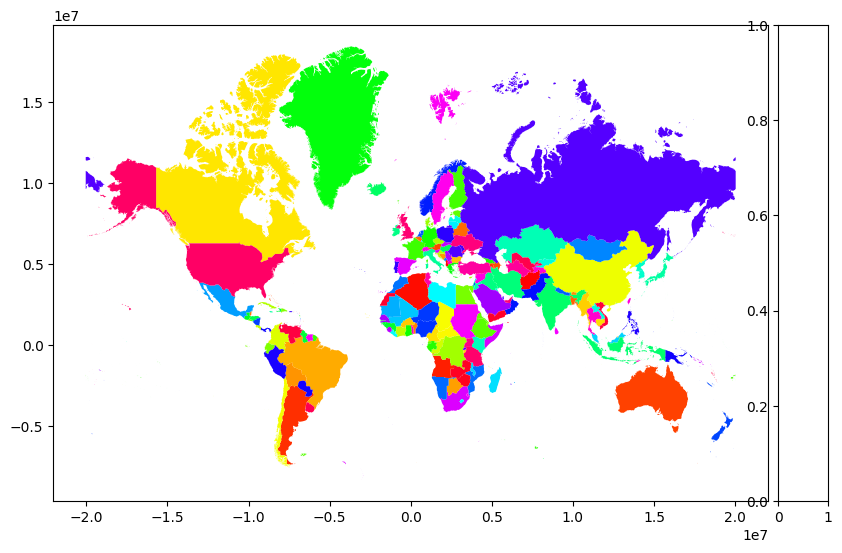

In [52]:
# Resizing the legend 
fig, ax=plt.subplots(figsize=(10,10))
divider=make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%",pad=0.1)
world_data.plot(column='NAME',cmap='hsv',legend=None, 
                legend_kwds= {'label': "Area of the country (Sq. Km.)"},
                ax = ax, cax=cax)

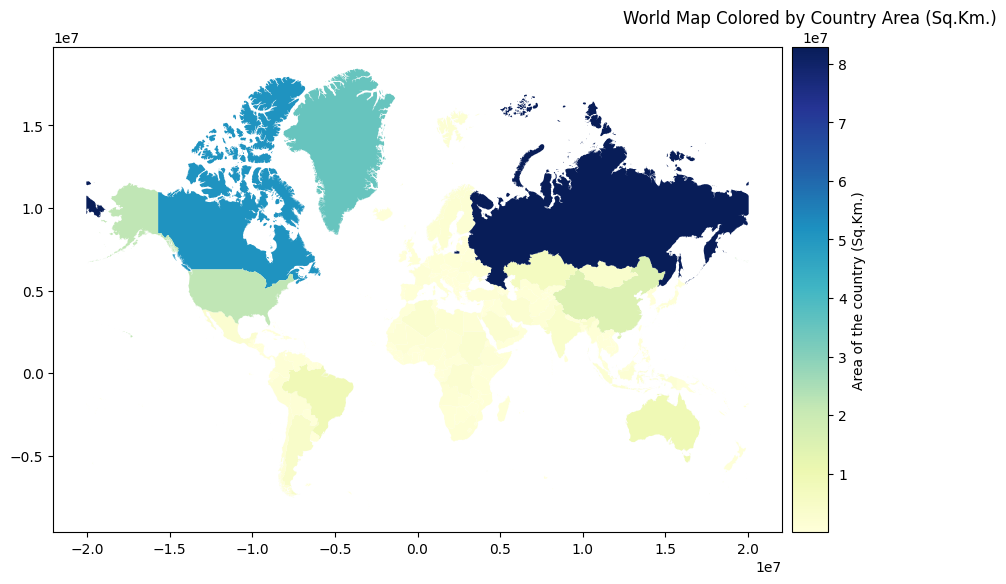

In [53]:
# Plotting the data with area-based color
fig, ax=plt.subplots(figsize=(10,10))
divider=make_axes_locatable(ax)
cax=divider.append_axes("right",size="5%",pad=0.1)

world_data.plot(
    column='area',cmap='YlGnBu',legend=True,
    legend_kwds={'label': "Area of the country (Sq.Km.)"},
    ax=ax, cax=cax
)

plt.title("World Map Colored by Country Area (Sq.Km.)")
plt.show()